<a href="https://colab.research.google.com/github/hari-ar/LendingClub/blob/main/CaseStudy_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#This is the notebook for the case study for Module 1 EDA.

Imports for the analysis.

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import plotly.express as px #plotting

Load the file.

In [ ]:
imported_data = pd.read_csv("/content/loan.csv")

In [ ]:
imported_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [ ]:
imported_data.shape


(39717, 111)

In [ ]:
imported_data.columns[imported_data.isna().any()].tolist()

['emp_title',
 'emp_length',
 'desc',
 'title',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'revol_util',
 'last_pymnt_d',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il

In [ ]:

print("Count where all values are NA is :" , imported_data.isnull().all(axis=0).sum())


Count where all values are NA is : 54


54 of the columns have all empty records. Hence they are not useful for our analysis. So removing them from the dataset.

Drop the cells with all na values and check for columns with high missing data.

In [ ]:
dropped_na=imported_data.dropna(axis=1, how='all')
round(100*dropped_na.isnull().mean(),2)


id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

**Analyze columns with hign number of NA and remove them**
* We notice mths_since_last_record, next_pymnt_d has high nulls and can be safely removed.

* mths_since_last_delinq is also on the higher side, but since that is a field with potential impact, keeping it for now.

In [ ]:
filtered = dropped_na.drop(['mths_since_last_record', 'next_pymnt_d'], axis=1)
filtered.head()



,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


*   There are several columns which are single valued




In [ ]:
filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

* We notice some numeric columns are objects like term, int_rate. So, check what is causing that.

In [ ]:
filtered.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

* Since the data contains only 2 values 36 months and 60 months we can leave it as is, instead of converting them to numeric values.

In [ ]:
filtered.int_rate.unique()

array(['10.65%', '15.27%', '15.96%', '13.49%', '12.69%', '7.90%',
       '18.64%', '21.28%', '14.65%', '9.91%', '16.29%', '6.03%', '11.71%',
       '12.42%', '14.27%', '16.77%', '7.51%', '8.90%', '18.25%', '6.62%',
       '19.91%', '17.27%', '17.58%', '21.67%', '19.42%', '22.06%',
       '20.89%', '20.30%', '23.91%', '19.03%', '23.52%', '23.13%',
       '22.74%', '22.35%', '24.11%', '6.00%', '22.11%', '7.49%', '11.99%',
       '5.99%', '10.99%', '9.99%', '18.79%', '11.49%', '8.49%', '15.99%',
       '16.49%', '6.99%', '12.99%', '15.23%', '14.79%', '5.42%', '10.59%',
       '17.49%', '15.62%', '21.36%', '19.29%', '13.99%', '18.39%',
       '16.89%', '17.99%', '20.62%', '20.99%', '22.85%', '19.69%',
       '20.25%', '23.22%', '21.74%', '22.48%', '23.59%', '12.62%',
       '18.07%', '11.63%', '7.91%', '7.42%', '11.14%', '20.20%', '12.12%',
       '19.39%', '16.11%', '17.54%', '22.64%', '13.84%', '16.59%',
       '17.19%', '12.87%', '20.69%', '9.67%', '21.82%', '19.79%',
       '18.49%', '

Since the rate contains % we can convert this to numeric if we strip the percentage.

* This shows the rates vary from about 6 all the way upto 24 in some instances.

Let us check the variance of the columns, remove outliers or columns with same values.

In [ ]:
filtered.var().sort_values()

tax_liens                     0.000000e+00
delinq_amnt                   0.000000e+00
chargeoff_within_12_mths      0.000000e+00
acc_now_delinq                0.000000e+00
policy_code                   0.000000e+00
collections_12_mths_ex_med    0.000000e+00
pub_rec_bankruptcies          4.174831e-02
pub_rec                       5.626382e-02
delinq_2yrs                   2.418786e-01
inq_last_6mths                1.145369e+00
open_acc                      1.936249e+01
dti                           4.460361e+01
total_rec_late_fee            5.314380e+01
total_acc                     1.299990e+02
mths_since_last_delinq        4.848830e+02
collection_recovery_fee       2.210324e+04
installment                   4.362871e+04
out_prncp_inv                 1.397447e+05
out_prncp                     1.407547e+05
recoveries                    4.743694e+05
total_rec_int                 6.802248e+06
last_pymnt_amnt               1.977702e+07
total_rec_prncp               4.992160e+07
funded_amnt

There are some columns with 0 variance they can be safely removed.

In [ ]:
filtered = filtered.drop(['delinq_amnt', 'tax_liens', 'chargeoff_within_12_mths', 'acc_now_delinq', 'policy_code', 'collections_12_mths_ex_med'], axis=1)


In [ ]:
filtered['int_rate']=filtered.int_rate.apply(lambda x: float(str(x).replace("%", "")))
filtered.int_rate.unique()

array([10.65, 15.27, 15.96, 13.49, 12.69,  7.9 , 18.64, 21.28, 14.65,
        9.91, 16.29,  6.03, 11.71, 12.42, 14.27, 16.77,  7.51,  8.9 ,
       18.25,  6.62, 19.91, 17.27, 17.58, 21.67, 19.42, 22.06, 20.89,
       20.3 , 23.91, 19.03, 23.52, 23.13, 22.74, 22.35, 24.11,  6.  ,
       22.11,  7.49, 11.99,  5.99, 10.99,  9.99, 18.79, 11.49,  8.49,
       15.99, 16.49,  6.99, 12.99, 15.23, 14.79,  5.42, 10.59, 17.49,
       15.62, 21.36, 19.29, 13.99, 18.39, 16.89, 17.99, 20.62, 20.99,
       22.85, 19.69, 20.25, 23.22, 21.74, 22.48, 23.59, 12.62, 18.07,
       11.63,  7.91,  7.42, 11.14, 20.2 , 12.12, 19.39, 16.11, 17.54,
       22.64, 13.84, 16.59, 17.19, 12.87, 20.69,  9.67, 21.82, 19.79,
       18.49, 22.94, 24.59, 24.4 , 21.48, 14.82, 14.17,  7.29, 17.88,
       20.11, 16.02, 17.51, 13.43, 14.91, 13.06, 15.28, 15.65, 17.14,
       11.11, 10.37, 16.4 ,  7.66, 10.  , 18.62, 10.74,  5.79,  6.92,
        9.63, 14.54, 12.68, 19.36, 13.8 , 18.99, 21.59, 20.85, 21.22,
       19.74, 20.48,

Next up, while analysing the loan_status we see there are some loans with status as current. We might not need those rows as we do not have the signal of any default.

In [ ]:
filtered = filtered[filtered.loan_status.str.lower() != 'current']
filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   member_id                38577 non-null  int64  
 2   loan_amnt                38577 non-null  int64  
 3   funded_amnt              38577 non-null  int64  
 4   funded_amnt_inv          38577 non-null  float64
 5   term                     38577 non-null  object 
 6   int_rate                 38577 non-null  float64
 7   installment              38577 non-null  float64
 8   grade                    38577 non-null  object 
 9   sub_grade                38577 non-null  object 
 10  emp_title                36191 non-null  object 
 11  emp_length               37544 non-null  object 
 12  home_ownership           38577 non-null  object 
 13  annual_inc               38577 non-null  float64
 14  verification_status   

In [ ]:
filtered.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

**Analysis**

* Since the assignment is about, understanding how likely it is for a person to default, we can skip univariate analysis and focus on bi-variate analysis.

* For further analysis, lets split the data into two sets. ChargedOff and Fullypaid.

In [ ]:
chargedOff=filtered[filtered.loan_status == 'Charged Off']
fullyPaid=filtered[filtered.loan_status == 'Fully Paid']

Let's analyze the interest rates of Defaulters vs Non Defaulters

## Visualizing Categorical Data
Univariate Analysis

Fully Paid     85.21853
Charged Off    14.78147
Name: loan_status, dtype: float64


Text(0.75, 0.1, 'Charged Off')

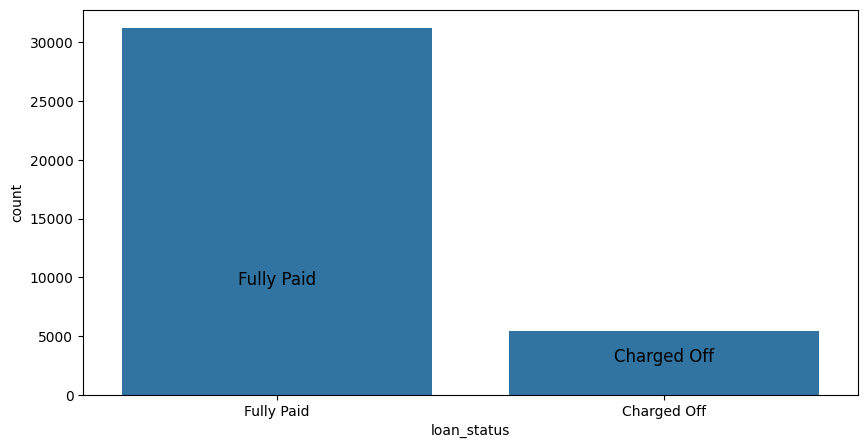

In [37]:
#sns.countplot(x = 'loan_status', data = filtered)
# Loan status
print(filtered.loan_status.value_counts()*100/filtered.loan_status.count())
# 0=Fully Paid, 1=Charged Off
plt.figure(figsize=(10,5))
ax=sns.countplot(x=filtered.loan_status)
ax.annotate('Fully Paid',xy=(0.25,0.3),xycoords='axes fraction',horizontalalignment='center',verticalalignment='center',fontsize=12)
ax.annotate('Charged Off',xy=(0.75,0.1),xycoords='axes fraction',horizontalalignment='center',verticalalignment='center',fontsize=12)


In [ ]:
# Loan Amount
print(filtered.loan_amnt.describe())
#Plotting histogram of loan amount
px.box(filtered,x='loan_amnt',width=750,height=350,title='Distribution of Loan Amount',labels={'loan_amnt':'Loan Amount'}).show()

count    36654.000000
mean     10682.249550
std       7048.414166
min        500.000000
25%       5000.000000
50%       9250.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


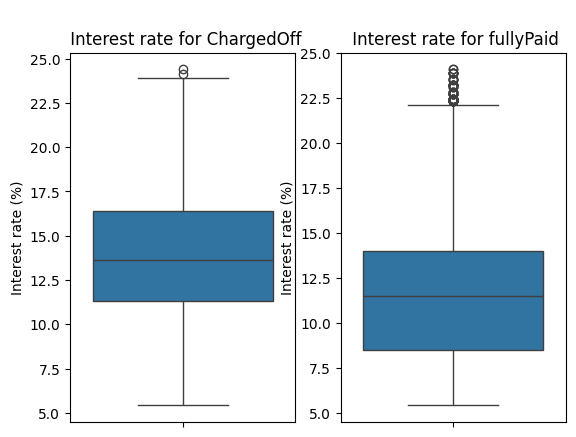

In [ ]:
plt.subplot(1,2,1)
sns.boxplot(y=chargedOff.int_rate)
plt.title("\n Interest rate for ChargedOff")
plt.ylabel('Interest rate (%)')


plt.subplot(1,2,2)
sns.boxplot(y=fullyPaid.int_rate)
plt.title("\n Interest rate for fullyPaid")
plt.ylabel('Interest rate (%)')

plt.show()

* It is observed that, charged off applicants have high median interest rate. One possible explanation is based on their credit score or risk. Which inturn resullts in high defualt.

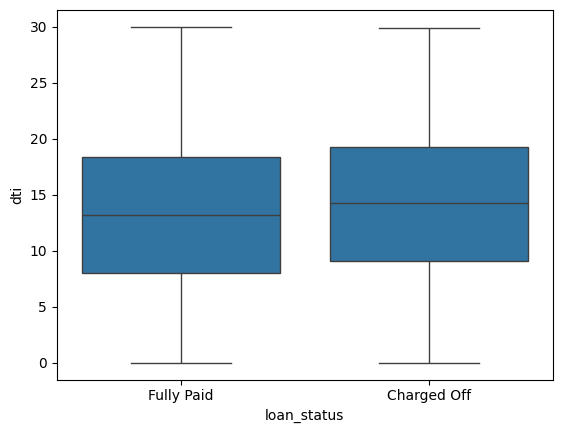

In [ ]:
    sns.boxplot(x=filtered['loan_status'], y=filtered['dti'])
    plt.show()

* We notice dti median is also slightly higher for Charged Off loans, compared to FUlly Paid.

 36 months    75.628854
 60 months    24.371146
Name: term, dtype: float64


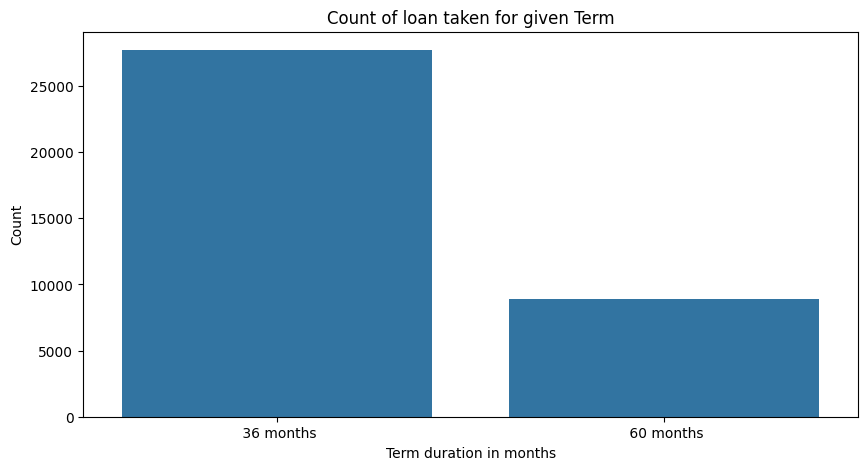

In [ ]:
# Term of loan
print(filtered.term.value_counts()*100/filtered.term.count())
# 0=Fully Paid, 1=Charged Off
plt.figure(figsize=(10,5))
ax=sns.countplot(x=filtered.term)
ax.set_title('Count of loan taken for given Term')
ax.set_xlabel('Term duration in months')
ax.set_ylabel('Count')
plt.show()

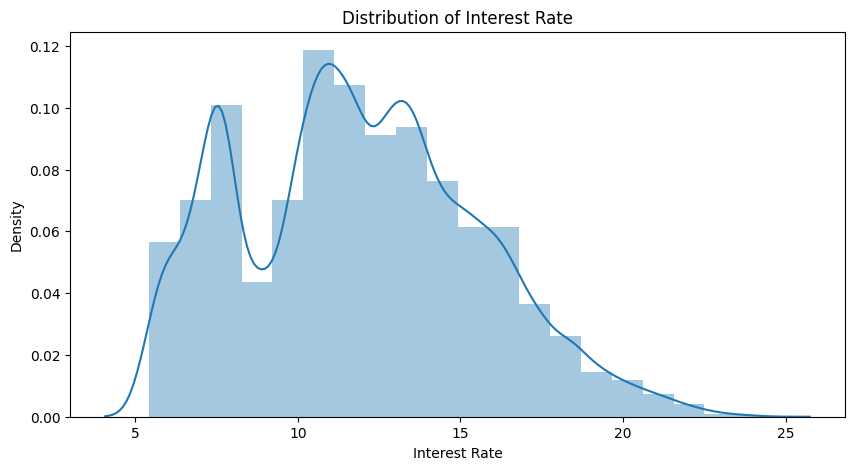

In [ ]:
# Distribution of interest rate
plt.figure(figsize=(10,5))
sns.distplot(sorted(filtered.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()